In [33]:
import mlrose_hiive
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from ast import literal_eval
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.metrics import accuracy_score
from mlrose_hiive import QueensGenerator, MaxKColorGenerator, TSPGenerator, ContinuousPeaksGenerator, FlipFlopGenerator, KnapsackGenerator
from mlrose_hiive import RHCRunner, SARunner, GARunner, MIMICRunner, SKMLPRunner

# Plot customization
plt.rcParams['axes.grid'] = True
plt.style.use('seaborn-colorblind')

In [34]:
SEED = 42
OUTPUT_DIRECTORY = 'results'

# Traveling Salesperson

In [35]:
problem = TSPGenerator.generate(seed=SEED, number_of_cities=22)
experiment_name = 'TSP_22'

In [36]:
rhc = RHCRunner(problem=problem,
                experiment_name=experiment_name,
                output_directory=OUTPUT_DIRECTORY,
                seed=SEED,
                iteration_list=2 ** np.arange(10),
                max_attempts=5000,
                restart_list=[25, 75, 100])  
                
# the two data frames will contain the results
rhc_run_stats, rhc_run_curves = rhc.run()

In [37]:
rhc_run_curves

,Iteration,Time,Fitness,FEvals,Restarts,max_iters,current_restart
0,0,0.000956,2674.196100,0.0,25,512,0
1,1,0.009766,2674.196100,1.0,25,512,0
2,2,0.011353,2674.196100,2.0,25,512,0
3,3,0.012623,2670.412454,4.0,25,512,0
4,4,0.012673,2667.096008,6.0,25,512,0
...,...,...,...,...,...,...,...
103934,508,0.062339,1177.201843,54816.0,100,512,100
103935,509,0.062438,1177.201843,54817.0,100,512,100
103936,510,0.062537,1177.201843,54818.0,100,512,100
103937,511,0.062637,1177.201843,54819.0,100,512,100


In [38]:
rhc_run_stats

,Iteration,Fitness,FEvals,Time,State,Restarts,max_iters,current_restart
0,0,2674.196100,0,0.000956,"[0, 13, 8, 1, 15, 5, 20, 11, 3, 4, 17, 12, 18,...",25,512,0
1,1,2674.196100,1,0.009766,"[0, 13, 8, 1, 15, 5, 20, 11, 3, 4, 17, 12, 18,...",25,512,0
2,2,2674.196100,2,0.011353,"[0, 13, 8, 1, 15, 5, 20, 11, 3, 4, 17, 12, 18,...",25,512,0
3,4,2667.096008,6,0.012673,"[8, 1, 0, 13, 15, 5, 20, 11, 3, 4, 17, 12, 18,...",25,512,0
4,8,2577.732145,11,0.013935,"[8, 1, 0, 9, 15, 5, 20, 11, 3, 4, 17, 12, 18, ...",25,512,0
...,...,...,...,...,...,...,...,...
2228,32,1845.598210,54317,544.356234,"[20, 16, 21, 3, 14, 0, 12, 15, 8, 18, 19, 13, ...",100,512,100
2229,64,1782.535436,54352,545.017294,"[20, 9, 16, 3, 14, 0, 12, 15, 8, 13, 19, 18, 4...",100,512,100
2230,128,1535.052670,54423,546.020144,"[19, 13, 16, 3, 14, 12, 0, 15, 17, 9, 11, 1, 4...",100,512,100
2231,256,1427.557103,54554,547.681579,"[19, 13, 16, 3, 14, 12, 0, 15, 17, 11, 1, 8, 4...",100,512,100


<AxesSubplot:>

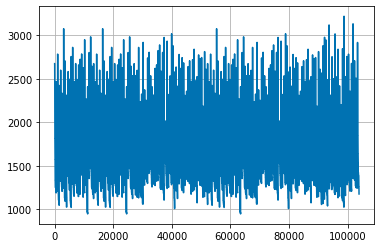

In [39]:
rhc_run_curves['Fitness'].plot()

In [40]:
sa = SARunner(problem=problem,
                experiment_name=experiment_name,
                output_directory=OUTPUT_DIRECTORY,
                seed=SEED,
                iteration_list=2 ** np.arange(14),
                max_attempts=5000,
                temperature_list=[1, 10, 50, 100, 250, 500, 1000, 2500, 5000, 10000],
                decay_list=[mlrose_hiive.GeomDecay])
            
# the two data frames will contain the results
sa_run_stats, sa_run_curves = sa.run()

In [41]:
sa_run_curves

,Iteration,Time,Fitness,FEvals,Temperature,max_iters
0,0,0.000140,2674.196100,0.0,1,8192
1,1,0.004199,2674.196100,1.0,1,8192
2,2,0.005598,2674.196100,2.0,1,8192
3,3,0.006844,2670.412454,4.0,1,8192
4,4,0.006895,2667.096008,6.0,1,8192
...,...,...,...,...,...,...
66763,8175,0.372210,993.990808,8665.0,10000,8192
66764,8176,0.372374,993.990808,8666.0,10000,8192
66765,8177,0.372541,993.990808,8667.0,10000,8192
66766,8178,0.372706,993.990808,8668.0,10000,8192


<AxesSubplot:>

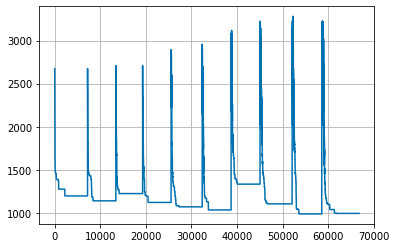

In [42]:
sa_run_curves['Fitness'].plot()

In [43]:
ga = GARunner(problem=problem,
                experiment_name=experiment_name,
                output_directory=OUTPUT_DIRECTORY,
                seed=SEED,
                iteration_list=2 ** np.arange(12),
                max_attempts=1000,
                population_sizes=[150, 200, 300],
                mutation_rates=[0.4, 0.5, 0.6])
                
# the two data frames will contain the results
ga_run_stats, ga_run_curves = ga.run()

In [44]:
ga_run_curves

,Iteration,Time,Fitness,FEvals,Population Size,Mutation Rate,max_iters
0,0,0.003072,2674.196100,150.0,150,0.4,2048
1,1,0.015040,1964.652057,302.0,150,0.4,2048
2,2,0.024786,1964.652057,453.0,150,0.4,2048
3,3,0.034181,1944.655830,605.0,150,0.4,2048
4,4,0.041962,1771.262399,757.0,150,0.4,2048
...,...,...,...,...,...,...,...
13959,1741,2.862195,899.008478,524364.0,300,0.6,2048
13960,1742,2.869812,899.008478,524665.0,300,0.6,2048
13961,1743,2.877282,899.008478,524966.0,300,0.6,2048
13962,1744,2.884657,899.008478,525267.0,300,0.6,2048


<AxesSubplot:>

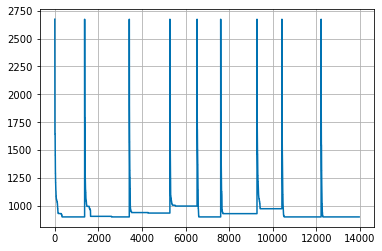

In [45]:
ga_run_curves['Fitness'].plot()

In [46]:
mmc = MIMICRunner(problem=problem,
                    experiment_name=experiment_name,
                    output_directory=OUTPUT_DIRECTORY,
                    seed=SEED,
                    iteration_list=2 ** np.arange(10),
                    max_attempts=500,
                    keep_percent_list=[0.25, 0.5, 0.75],
                    population_sizes=[150, 200, 300])          
# the two data frames will contain the results
mmc_run_stats, mmc_run_curves = mmc.run()

In [47]:
mmc_run_curves

,Iteration,Time,Fitness,FEvals,use_fast_mimic,Population Size,Keep Percent,max_iters
0,0,0.003974,2674.196100,150.0,False,150,0.25,512
1,1,0.117884,1870.435875,302.0,False,150,0.25,512
2,2,0.229489,1776.724964,454.0,False,150,0.25,512
3,3,0.336690,1763.436294,606.0,False,150,0.25,512
4,4,0.443163,1716.552592,758.0,False,150,0.25,512
...,...,...,...,...,...,...,...,...
4590,505,49.524258,1718.529601,152309.0,False,300,0.75,512
4591,506,49.620674,1718.529601,152610.0,False,300,0.75,512
4592,507,0.002327,1718.529601,152911.0,False,300,0.75,512
4593,508,0.112836,1718.529601,153212.0,False,300,0.75,512


<AxesSubplot:>

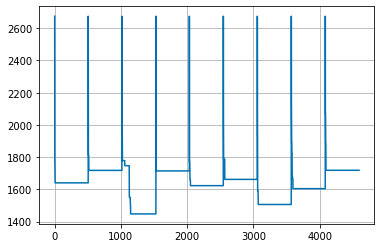

In [48]:
mmc_run_curves['Fitness'].plot()